In [1]:
import pickle
from random import shuffle, seed
import numpy as np
from util import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

import warnings
warnings.filterwarnings('ignore') # get rid of silly sklearn warnings

seed("sahai uwu")

In [2]:
ppath = "/Volumes/scottd/mimic_processed/preproced.bin"
data = pickle.load(open(ppath, 'rb')) # Tuples of (text, label) where label is 0 or 1
shuffle(data)

split_point = int(0.8 * len(data)) # Use 80% of our data for training and the rest for testing
train = data[:split_point]
test = data[split_point:]

train_data = [t[0] for t in train]
train_labels = [t[1] for t in train]
test_data = [t[0] for t in test]
test_labels = [t[1] for t in test]

print("Number of training samples: " + str(len(train)))
print("Number of test samples: " + str(len(test)))
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

Number of training samples: 5660
Number of test samples: 1415
(array([0, 1]), array([3347, 2313]))
(array([0, 1]), array([859, 556]))


Accuracy: 0.8855123674911661


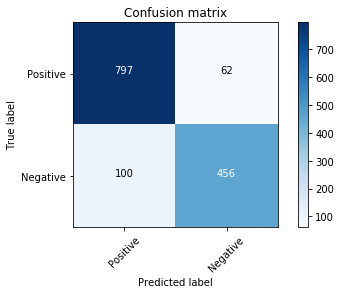

0.07217694994179279
0.8201438848920863
[0.39293286 0.88030888 1.        ]
[1.         0.82014388 0.        ]


In [3]:
# The first classification technique we will try is SVM on TF-IDF vectors
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

classifier = make_pipeline(CountVectorizer(), TfidfTransformer(), SGDClassifier(loss='hinge', penalty='l2', alpha=0.0005, max_iter=100)) 
classifier.fit(train_data, train_labels)

predictions = classifier.predict(test_data)
print("Accuracy: " + str(np.mean(predictions == test_labels)))

conf_mat = confusion_matrix(test_labels, predictions)

plt.figure()
plot_confusion_matrix(conf_mat, ["Positive", "Negative"])
plt.show()

fpr, tpr, _ = roc_curve(test_labels, predictions, pos_label=1)
print(fpr[1])
print(tpr[1])

precision, recall, _ = precision_recall_curve(test_labels, predictions)
print(precision)
print(recall)



Accuracy: 0.8


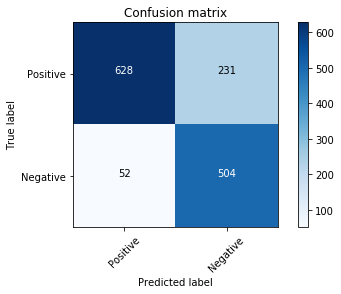

In [4]:
# Next, try k-Nearest Neighbors on TF-IDF vectors
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

classifier = make_pipeline(CountVectorizer(), TfidfTransformer(), KNeighborsClassifier(n_neighbors=5)) 
classifier.fit(train_data, train_labels)

predictions = classifier.predict(test_data)
print("Accuracy: " + str(np.mean(predictions == test_labels)))

conf_mat = confusion_matrix(test_labels, predictions)

plt.figure()
plot_confusion_matrix(conf_mat, ["Positive", "Negative"])
plt.show()

Accuracy: 0.8558303886925795


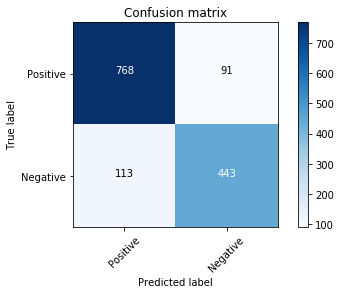

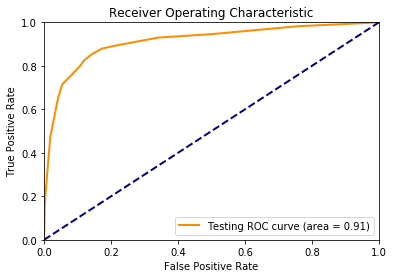

In [5]:
# Finally, try Random Forests
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

classifier = make_pipeline(CountVectorizer(), TfidfTransformer(), RandomForestClassifier(n_estimators=16)) 
classifier.fit(train_data, train_labels)

predictions = classifier.predict(test_data)
print("Accuracy: " + str(np.mean(predictions == test_labels)))

conf_mat = confusion_matrix(test_labels, predictions)

plt.figure()
plot_confusion_matrix(conf_mat, ["Positive", "Negative"])
plt.show()

class_probs = classifier.predict_proba(test_data)
conf = [c[1] for c in class_probs]

fpr, tpr, thresholds = roc_curve(test_labels, conf, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Testing ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()